In [53]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        #Initialize layer sizes and learning rate
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        #Initialize weights and biases, as matrices.  allows for easy matrix operations
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_hidden = np.random.uniform(-1, 1, (1, hidden_size))
        self.bias_output = np.random.uniform(-1, 1, (1, output_size))

    #Sigmoid function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    #Derivative of sigmoid, x instead of sigmoid(x) as we pass the activations and not the values
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    #Feedforward method, simply calculates values with weights and adds biases for each layer
    def feedforward(self, X):
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.sigmoid(output_layer_input)
        return predicted_output

    #backpropagation method
    def train(self, epochs, batch_size):
        for epoch in range(epochs):
            #Generate test data for each epoch
            #It simply makes an 8x8 matrix of zeros with a 1 on the diagonal,
            #meaning that each test case is in each epoch
            #and the gradient descent is applied in batches
            indices = np.random.choice(self.input_size, batch_size, replace=False)
            X = np.eye(self.input_size)[indices]

            #Get output
            predicted_output = self.feedforward(X)

            #Calculate error
            error = X - predicted_output

            #Backward propagation
            d_predicted_output = error * self.sigmoid_derivative(predicted_output)
            error_hidden_layer = d_predicted_output.dot(self.weights_hidden_output.T)
            hidden_layer_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
            d_hidden_layer = error_hidden_layer * self.sigmoid_derivative(hidden_layer_output)

            #Updating the weights biases
            self.weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * self.learning_rate
            self.bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
            self.weights_input_hidden += X.T.dot(d_hidden_layer) * self.learning_rate
            self.bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate


    def test(self, X):
        predicted_output = self.feedforward(X)
        return predicted_output

    def test_all_cases(self):
        correct_predictions = 0
        for i in range(self.input_size):
            #Creates a vector where one of the indices is 1 and all others are 0
            input_vector = np.zeros((1, self.input_size))
            input_vector[0, i] = 1

            #Get the output from the NN
            output_vector = self.feedforward(input_vector)

            #Convert output to binary (largest value is 1, all others are 0)
            one_hot_output = np.zeros_like(output_vector)
            one_hot_output[0, np.argmax(output_vector)] = 1

            #Check if they are equal
            if np.array_equal(one_hot_output, input_vector):
                correct_predictions += 1
        #Return number of mistakes
        return 8-correct_predictions

Epochs: 1, Average Error str(average_error)
Epochs: 201, Average Error str(average_error)
Epochs: 401, Average Error str(average_error)
Epochs: 601, Average Error str(average_error)
Epochs: 801, Average Error str(average_error)
Epochs: 1001, Average Error str(average_error)
Epochs: 1201, Average Error str(average_error)
Epochs: 1401, Average Error str(average_error)
Epochs: 1601, Average Error str(average_error)
Epochs: 1801, Average Error str(average_error)
Epochs: 2001, Average Error str(average_error)
Epochs: 2201, Average Error str(average_error)
Epochs: 2401, Average Error str(average_error)
Epochs: 2601, Average Error str(average_error)
Epochs: 2801, Average Error str(average_error)


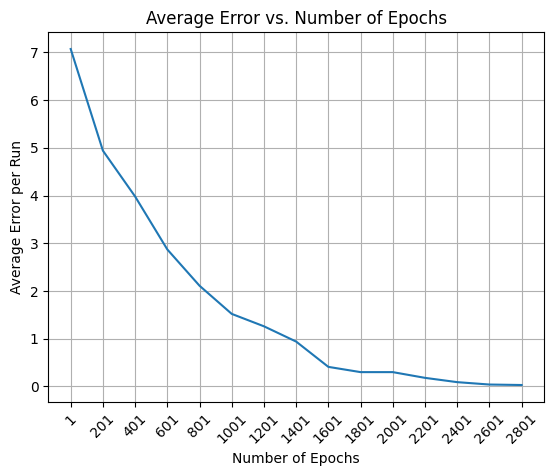

In [54]:
input_size = 8
hidden_size = 3
output_size = 8
learning_rate = 0.1
total_runs = 100

def test_network(epochs, total_runs):
    total_error = 0
    for _ in range(total_runs):
        nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
        nn.train(epochs=epochs, batch_size=8)
        total_error += nn.test_all_cases()
    return total_error / total_runs

# Running the tests
errors_per_epoch = []
epoch_values = list(range(1, 3001, 200))  # from 1 to 2001 with steps of 200
for epochs in epoch_values:
    average_error = test_network(epochs, total_runs)
    errors_per_epoch.append(average_error)
    print('Epochs: ' + str(epochs) + ', Average Error ' + 'str(average_error)')

# Plotting the results
plt.plot(epoch_values, errors_per_epoch)
plt.title('Average Error vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Average Error per Run')
plt.xticks(epoch_values, rotation=45)
plt.grid(True)
plt.show()

In [60]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
nn.train(epochs=3000, batch_size=8)

These are the weights going into the hidden layer.
So there is an inner list for each neuron in layer 1, namely 8, then each inner layers contains the weights towards all neurons in layer 2, so 3 for each.

In [61]:
nn.weights_input_hidden

array([[ 2.91982514, -3.35763241, -2.1248681 ],
       [ 2.94947397,  3.39791227,  1.80433336],
       [ 3.1000192 , -1.49222343,  2.06030687],
       [-1.28547292, -4.13956406,  2.48325858],
       [-2.3615627 ,  1.43270429,  4.1594037 ],
       [-4.20820202,  2.6235516 , -1.39124421],
       [ 1.52830219,  2.78432001, -3.86302428],
       [-2.74322442, -2.88106287, -3.09523815]])

Weights going from the hidden layer to the output layer.
The opposite from before, 3 inner lists, with 8 values each.

In [62]:
nn.weights_hidden_output

array([[ 4.69077025,  2.68553756,  2.95220066, -2.52605349, -4.02413929,
        -6.78014739,  2.94156568, -4.2393981 ],
       [-5.13801198,  3.02057865, -2.24966125, -6.47240708,  2.84796816,
         4.50134076,  3.81567733, -4.02243242],
       [-4.00538868,  2.20772919,  2.55298289,  4.78508814,  5.05563436,
        -3.23512916, -6.08309887, -4.3779633 ]])

The biases for the nodes in the hidden layer.

In [63]:
nn.bias_hidden

array([[-0.27126739, -0.205755  , -0.00031922]])

The biases for the nodes in the output layer.

In [64]:
nn.bias_output

array([[-2.07670118, -6.42667141, -4.20362443, -2.4448086 , -5.59535149,
        -1.8035778 , -4.16050587,  2.26167008]])